<a href="https://colab.research.google.com/github/brendaFlavia/DeepLearningAssignment/blob/main/Copy_of_LungOpacity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
import glob
import pandas as pd
from tensorflow import keras
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models, utils, losses, callbacks
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, accuracy_score, roc_auc_score
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import pathlib
#train and Validation data directory 
#data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/Dataset1') 

#test data directory
#test_data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/unknown_images') 
#test_data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/test_unknown') 

#train and Validation data directory 
train_data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/train_images') 

#test data directory
test_data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/test_images') 

dataset2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/Dataset2') 

Mounted at /content/gdrive


In [ ]:
img_width, img_height = 391,488
batch_size = 20

In [ ]:
# Define image data generators
# Train data


train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 689 files belonging to 2 classes.
Using 483 files for training.


In [ ]:
# Validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 689 files belonging to 2 classes.
Using 206 files for validation.


In [ ]:
#batch_size=10
test_data = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=26
  )


Found 26 files belonging to 2 classes.


In [ ]:
# Load class names for the dataset
class_names = val_ds.class_names
print(class_names)

['normal', 'sick']


In [ ]:
# Load class names for the dataset
class_names = train_ds.class_names
print(class_names)

['normal', 'sick']


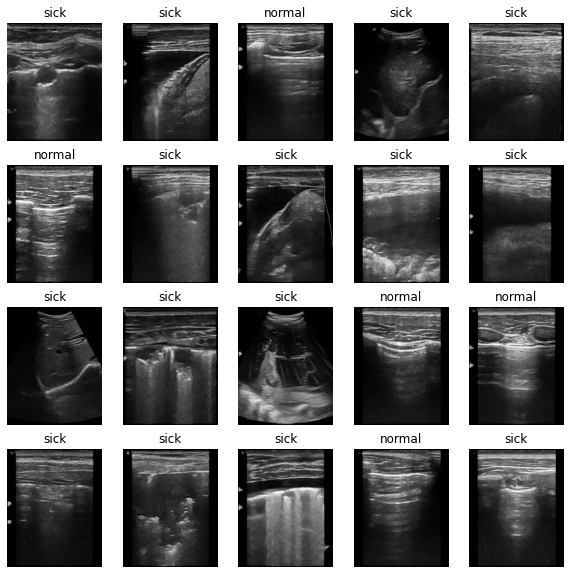

In [ ]:


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 488, 391, 3)
(20,)


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_data.prefetch(buffer_size=AUTOTUNE)

In [ ]:
#create a model
model = models.Sequential()

In [ ]:
num_classes = num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
#model.summary()

In [ ]:
result=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
)

Epoch 1/10
25/25 [==============================] - 321s 9s/step - loss: 0.9511 - accuracy: 0.8219 - val_loss: 0.1653 - val_accuracy: 0.9466
Epoch 2/10
25/25 [==============================] - 4s 149ms/step - loss: 0.1291 - accuracy: 0.9482 - val_loss: 0.1404 - val_accuracy: 0.9417
Epoch 3/10
25/25 [==============================] - 4s 148ms/step - loss: 0.0605 - accuracy: 0.9814 - val_loss: 0.1031 - val_accuracy: 0.9612
Epoch 4/10
25/25 [==============================] - 4s 149ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.1796 - val_accuracy: 0.9417
Epoch 5/10
25/25 [==============================] - 4s 149ms/step - loss: 9.6080e-04 - accuracy: 1.0000 - val_loss: 0.2077 - val_accuracy: 0.9466
Epoch 6/10
25/25 [==============================] - 4s 149ms/step - loss: 1.9947e-04 - accuracy: 1.0000 - val_loss: 0.2652 - val_accuracy: 0.9417
Epoch 7/10
25/25 [==============================] - 4s 149ms/step - loss: 1.5703e-04 - accuracy: 1.0000 - val_loss: 0.1981 - val_accuracy: 0.

Check Accuracy on unknown images

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)

1/1 [==============================] - 4s 4s/step - loss: 2.8689e-05 - accuracy: 1.0000


In [ ]:
print(test_acc)

1.0


In [ ]:
test_loss, test_acc = model.evaluate(val_ds)

11/11 [==============================] - 1s 53ms/step - loss: 0.1837 - accuracy: 0.9612


In [ ]:
test_loss, test_acc = model.evaluate(train_ds)

25/25 [==============================] - 1s 53ms/step - loss: 7.6074e-05 - accuracy: 1.0000


Visualize Training and Validation Loss and Accuracy

Text(0.5, 1.0, 'Training and Validation Accuracy')

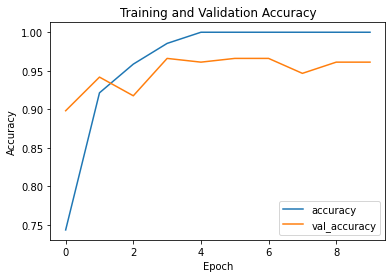

In [ ]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

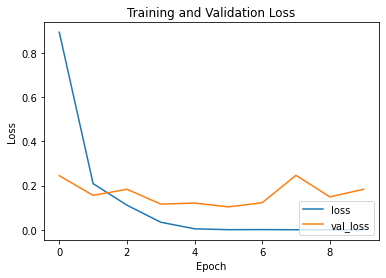

In [ ]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

Make Predictions on Known Images Lables

Predictions:
 [1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0]
Labels:
 [1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0]


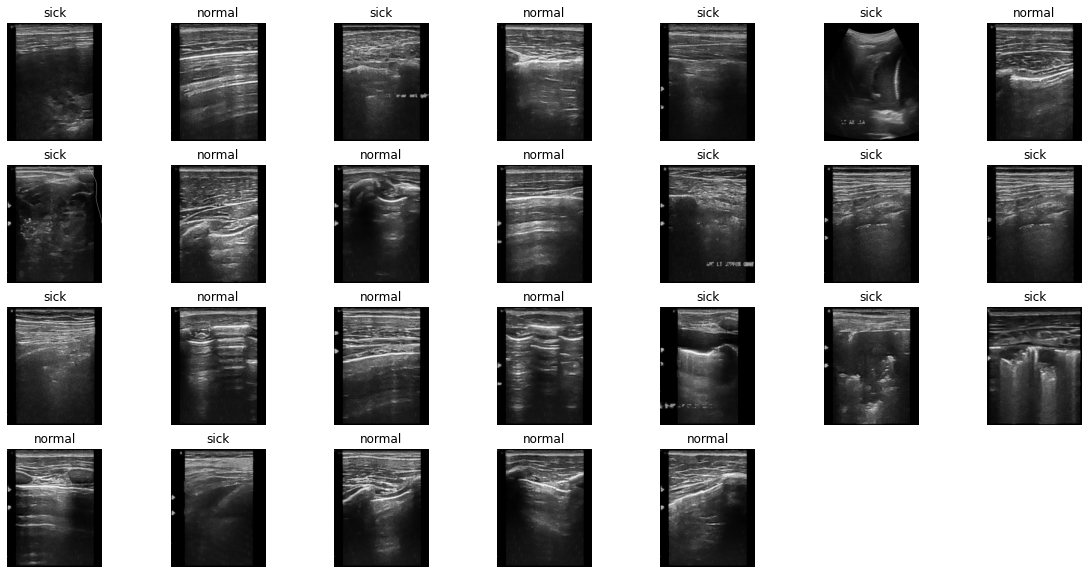

In [ ]:
image_batch, label_batch = test_data.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(26):
  ax = plt.subplot(4, 7, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

Apply Data Augumentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

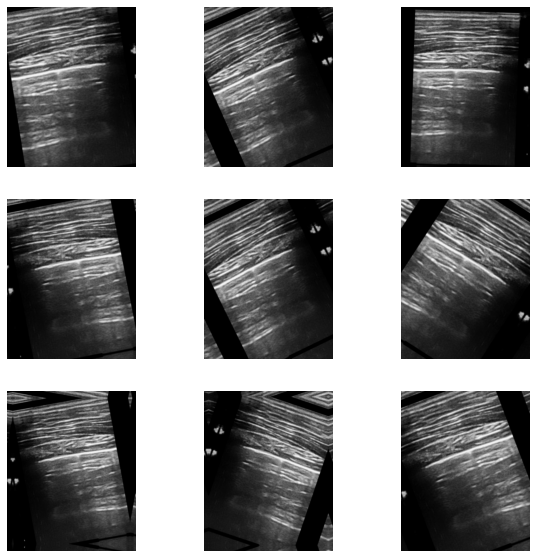

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
num_classes = num_classes = len(class_names)

model = tf.keras.Sequential([
    data_augmentation,
  tf.keras.layers.Rescaling(1./255,input_shape=(391, 488, 3)),
  tf.keras.layers.Conv2D(16, 3, activation='relu' ),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
#complie model

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
es=EarlyStopping(monitor='val_loss', mode='min',verbose=1)

In [ ]:
#fit the model

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
25/25 [==============================] - 5s 131ms/step - loss: 1.4127 - accuracy: 0.6501 - val_loss: 0.3352 - val_accuracy: 0.8447
Epoch 2/20
25/25 [==============================] - 3s 105ms/step - loss: 0.3707 - accuracy: 0.8323 - val_loss: 0.3055 - val_accuracy: 0.8447
Epoch 3/20
25/25 [==============================] - 3s 104ms/step - loss: 0.2858 - accuracy: 0.8551 - val_loss: 0.2527 - val_accuracy: 0.8883
Epoch 4/20
25/25 [==============================] - 3s 107ms/step - loss: 0.2814 - accuracy: 0.8799 - val_loss: 0.2558 - val_accuracy: 0.8786
Epoch 5/20
25/25 [==============================] - 3s 107ms/step - loss: 0.2342 - accuracy: 0.8841 - val_loss: 0.2351 - val_accuracy: 0.9029
Epoch 6/20
25/25 [==============================] - 3s 105ms/step - loss: 0.2665 - accuracy: 0.8841 - val_loss: 0.1876 - val_accuracy: 0.9272
Epoch 7/20
25/25 [==============================] - 3s 104ms/step - loss: 0.2347 - accuracy: 0.8841 - val_loss: 0.1802 - val_accuracy: 0.9417
Epoch 

Test accuracy on unknown Images

In [ ]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

1/1 - 1s - loss: 0.0504 - accuracy: 1.0000 - 560ms/epoch - 560ms/step


In [ ]:
test_loss, test_acc = model.evaluate(train_ds, verbose=2)

25/25 - 1s - loss: 0.0614 - accuracy: 0.9752 - 813ms/epoch - 33ms/step


In [ ]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

11/11 - 0s - loss: 0.1024 - accuracy: 0.9612 - 379ms/epoch - 34ms/step


Visualize Training an validation Results

Text(0.5, 1.0, 'Training and Validation Accuracy')

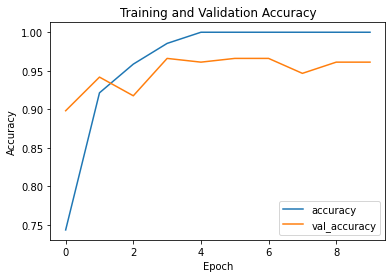

In [ ]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

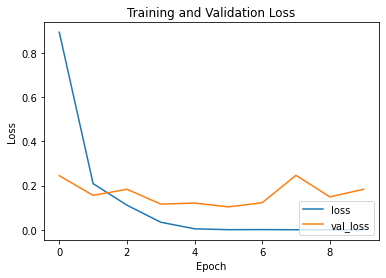

In [ ]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

Apply L2 Regulization to reduce overfitting

In [ ]:
num_classes = num_classes = len(class_names)

model = tf.keras.Sequential([
    data_augmentation,
  tf.keras.layers.Rescaling(1./255,input_shape=(391, 488, 3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same" ,kernel_regularizer=l2(0.0005)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same",kernel_regularizer=l2(0.0005)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same",kernel_regularizer=l2(0.0005)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(512, 5, activation='relu', padding="same",kernel_regularizer=l2(0.0005)),
  tf.keras.layers.MaxPooling2D(4,4),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
#complie model

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
25/25 [==============================] - 11s 304ms/step - loss: 1.1665 - accuracy: 0.6087 - val_loss: 0.7109 - val_accuracy: 0.5971
Epoch 2/30
25/25 [==============================] - 6s 245ms/step - loss: 0.6366 - accuracy: 0.7723 - val_loss: 0.6343 - val_accuracy: 0.8641
Epoch 3/30
25/25 [==============================] - 6s 243ms/step - loss: 0.5160 - accuracy: 0.8571 - val_loss: 0.7512 - val_accuracy: 0.5388
Epoch 4/30
25/25 [==============================] - 6s 238ms/step - loss: 0.4914 - accuracy: 0.8509 - val_loss: 0.5560 - val_accuracy: 0.7524
Epoch 5/30
25/25 [==============================] - 6s 236ms/step - loss: 0.4086 - accuracy: 0.8571 - val_loss: 0.5399 - val_accuracy: 0.7670
Epoch 6/30
25/25 [==============================] - 6s 236ms/step - loss: 0.3385 - accuracy: 0.8882 - val_loss: 0.8072 - val_accuracy: 0.5874
Epoch 7/30
25/25 [==============================] - 6s 235ms/step - loss: 0.3741 - accuracy: 0.8716 - val_loss: 0.3704 - val_accuracy: 0.8932
Epoch

Text(0.5, 1.0, 'Training and Validation Accuracy')

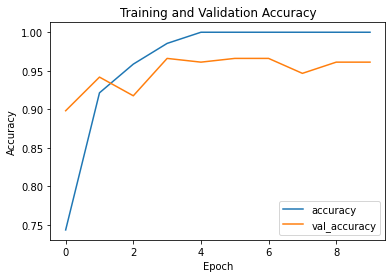

In [ ]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

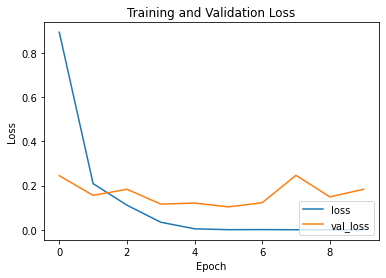

In [ ]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [ ]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

11/11 - 1s - loss: 0.2840 - accuracy: 0.8786 - 795ms/epoch - 72ms/step


In [ ]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

1/1 - 1s - loss: 0.2770 - accuracy: 0.9231 - 1s/epoch - 1s/step


In [ ]:
test_loss, test_acc = model.evaluate(train_ds, verbose=2)

25/25 - 2s - loss: 0.3454 - accuracy: 0.8489 - 2s/epoch - 71ms/step


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


csv_data2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/image_results2.csv')
test_data2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/unknown_images')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
test_ds2 = tf.keras.utils.image_dataset_from_directory(
  test_data2,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=50
  )

Found 50 files belonging to 1 classes.


Classification of unknown images

Predictions:
 [1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 1 1 0 0 1 1 0 1 1 0 1 1]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


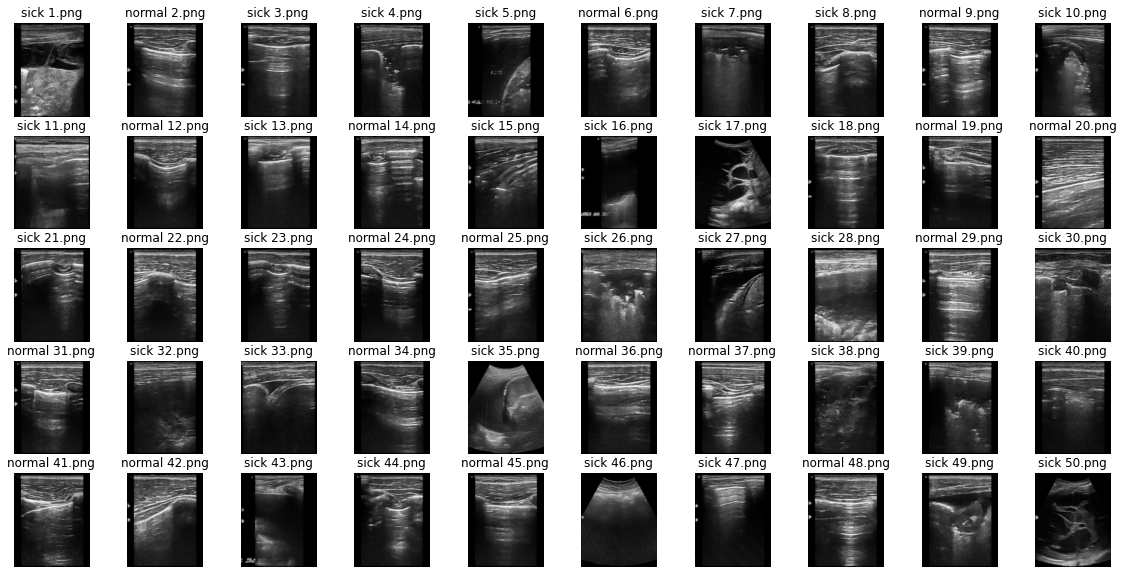

In [ ]:
image_batch, label_batch = test_ds2.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]]+ ' '+ str(i+1)+'.png')
  plt.axis("off")

SAVE RESULTS IN CSV

In [ ]:
  
# display the array
print(predictions.numpy())
  
# convert array into dataframe
DF = pd.DataFrame(predictions)
  
# save the dataframe as a csv file
DF.to_csv(csv_data2)

[1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0
 1 1 1 0 0 1 1 0 1 1 0 1 1]


PREDICTIONS ON KNOWN DATASET 2

In [ ]:
dataset2 = pathlib.Path('/content/gdrive/My Drive/DeepLearning/Dataset2/normal/sick_eff13.png') 


#image_path = tf.keras.utils.get_file('Known_image', origin=dataset2)

img = tf.keras.utils.load_img(
    dataset2, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sick with a 95.84 percent confidence.


In [ ]:
test_data_set2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/Dataset2')

In [ ]:
test_datas2 = tf.keras.utils.image_dataset_from_directory(
  test_data_set2,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=224
  )

Found 224 files belonging to 2 classes.


In [ ]:
image_batch, label_batch = test_datas2.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

ValueError: ignored

In [ ]:
image_batch, label_batch = test_datas2.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

#plt.figure(figsize=(20, 10))
#for i in range(10):
  #ax = plt.subplot(10, 10, i + 1)
  #plt.imshow(image_batch[i].astype("uint8"))
  #plt.title(class_names[predictions[i]])
  #plt.axis("off")

Predictions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1]
Labels:
 [1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1
 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0
 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1
 0 1]


Evalute model on Dataset 2

In [ ]:
test_loss1, test_acc1 = model.evaluate(test_datas2, verbose=2)

1/1 - 2s - loss: 1.7773 - accuracy: 0.4509 - 2s/epoch - 2s/step


In [ ]:
# Get predictions
#pred = model.predict(test_ds, batch_size=16)
#pred = np.argmax(pred, axis=-1)
#pred = tf.math.argmax(pred)
print(labels)
# original labels
labels =['sick','normal']
from sklearn.metrics import classification_report
print(classification_report(label_batch, predictions))


['sick', 'normal']


ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#X, y = make_classification(random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#clf = SVC(random_state=0)
#clf.fit(X_train, y_train)
#SVC(random_state=0)
#predictions = model.predict(X_test)
classes=['normal','sick']
cm = confusion_matrix(classes, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()

plt.show()

In [ ]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
25/25 [==============================] - 6s 238ms/step - loss: 0.1997 - accuracy: 0.9400 - val_loss: 0.2392 - val_accuracy: 0.8981
Epoch 2/100
25/25 [==============================] - 6s 243ms/step - loss: 0.2123 - accuracy: 0.9296 - val_loss: 0.5474 - val_accuracy: 0.7087
Epoch 3/100
25/25 [==============================] - 6s 242ms/step - loss: 0.1646 - accuracy: 0.9524 - val_loss: 0.2431 - val_accuracy: 0.9029
Epoch 4/100
25/25 [==============================] - 6s 240ms/step - loss: 0.1826 - accuracy: 0.9379 - val_loss: 0.2971 - val_accuracy: 0.8592
Epoch 5/100
25/25 [==============================] - 6s 237ms/step - loss: 0.1880 - accuracy: 0.9400 - val_loss: 0.2780 - val_accuracy: 0.8689
Epoch 6/100
25/25 [==============================] - 6s 236ms/step - loss: 0.1842 - accuracy: 0.9462 - val_loss: 0.4184 - val_accuracy: 0.8301
Epoch 7/100
25/25 [==============================] - 6s 234ms/step - loss: 0.1686 - accuracy: 0.9420 - val_loss: 0.3910 - val_accuracy: 0.8350

Text(0.5, 1.0, 'Training and Validation Accuracy')

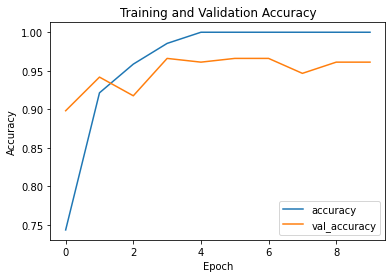

In [ ]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

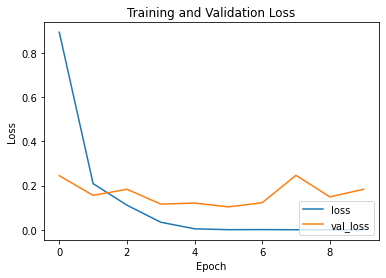

In [ ]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [ ]:
test_loss1, test_acc1 = model.evaluate(test_ds2, verbose=2)

1/1 - 0s - loss: 7.4452 - accuracy: 0.5400 - 418ms/epoch - 418ms/step


In [ ]:
test_loss1, test_acc1 = model.evaluate(test_datas2, verbose=2)

1/1 - 2s - loss: 7.7449 - accuracy: 0.4554 - 2s/epoch - 2s/step


In [ ]:
test_loss1, test_acc1 = model.evaluate(test_ds, verbose=2)

1/1 - 0s - loss: 0.0281 - accuracy: 1.0000 - 237ms/epoch - 237ms/step


Predictions:
 [0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 0 1]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


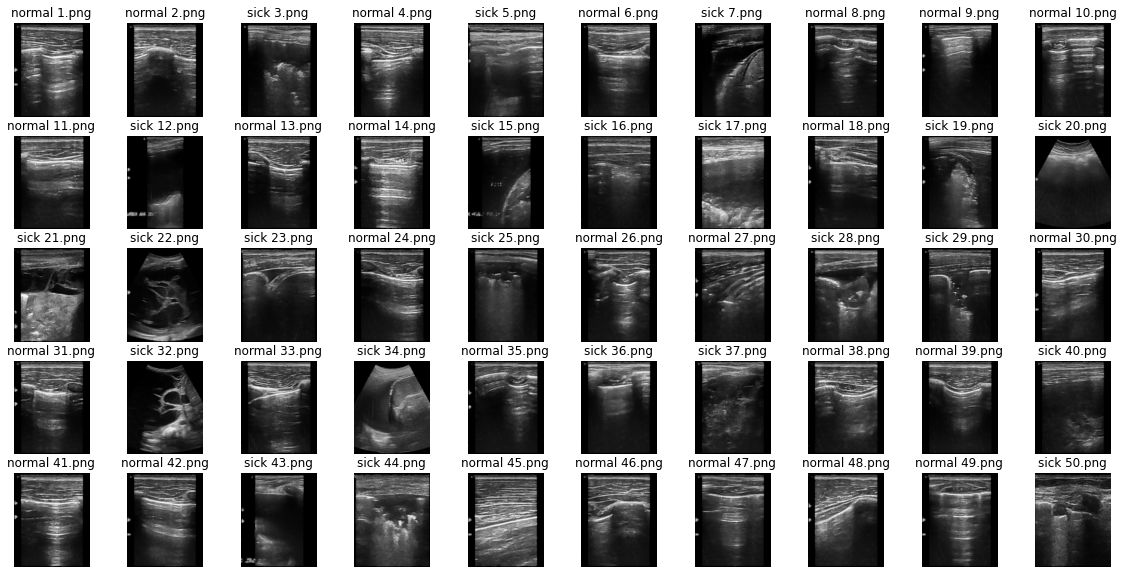

In [ ]:
image_batch, label_batch = test_ds2.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]]+ ' '+ str(i+1)+'.png')
  plt.axis("off")

In [ ]:
csv_data2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/image_results3.csv')

In [ ]:
# display the array
print(predictions.numpy())
  
# convert array into dataframe
DF = pd.DataFrame(predictions)
  
# save the dataframe as a csv file
DF.to_csv(csv_data2)

[0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 0 1]
